<a href="https://colab.research.google.com/github/vipulcvaru/SoftwareLAB/blob/main/IR_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manual Implementation of PageRank using Beautiful Soup and Python

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# Function to scrape links from a webpage
def scrape_links(url):
    try:
        response = requests.get(url)#Uses requests.get to send a GET request to the specified URL.
        soup = BeautifulSoup(response.content, 'html.parser')#The html.parser argument specifies the parser used to interpret the HTML.
        links = {a['href'] for a in soup.find_all('a', href=True)}#soup.find_all('a', href=True): Finds all <a> tags that have an href attribute (i.e., clickable links).
        return links
    except Exception as e:
        print(f"Failed to scrape {url}: {e}")
        return set()

In [ ]:
# Websites to analyze
websites = ['https://inc42.com/buzz', 'https://myanimelist.net', 'https://techcrunch.com', 'https://neokyo.com/en/kpop']

In [ ]:
# Initialize variables for PageRank
d = 0.85  # damping factor : This factor simulates a user who continues to follow links on a webpage but occasionally jumps to a random page.
num_iterations = 100
pagerank = {url: 1.0 / len(websites) for url in websites}
#This dictionary comprehension assigns an equal initial PageRank to each website, calculated as 1.0 / len(websites). This assumes each site initially has an equal probability in the rank distribution.

NameError: name 'websites' is not defined

In [ ]:
# Create a mapping of links
link_map = {url: scrape_links(url) for url in websites}
#link_map: Creates a dictionary mapping each url in websites to the set of links it contains.

In [ ]:
# Manual PageRank algorithm
for _ in range(num_iterations):  #Loops through the PageRank calculations multiple times (as defined by num_iterations) to allow values to converge.
    new_pagerank = {} # Initializes a new dictionary to store the updated PageRank scores for each webpage.
    for url in websites:
        new_rank = (1 - d) / len(websites) #Sets a base rank for each url, accounting for the chance a user may randomly navigate to any page.
        for linking_url in link_map:
            if url in link_map[linking_url]:  # Checks if the linking_url contains a link to the current url. If true, url receives rank credit from linking_url.
                new_rank += d * (pagerank[linking_url] / len(link_map[linking_url]))#Increases new_rank for url based on the rank of linking_url, weighted by the number of outbound links from linking_url. The more links a page has, the less credit each individual link gives.
        new_pagerank[url] = new_rank
    pagerank = new_pagerank

In [ ]:
# Display the PageRank values in sorted order
print("\nPageRank using Manual Implementation (sorted):")
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
for url, rank in sorted_pagerank:
    print(f"{url}: {rank:.4f}")


PageRank using Manual Implementation (sorted):
https://neokyo.com/en/kpop: 0.0379
https://techcrunch.com: 0.0377
https://inc42.com/buzz: 0.0375
https://myanimelist.net: 0.0375


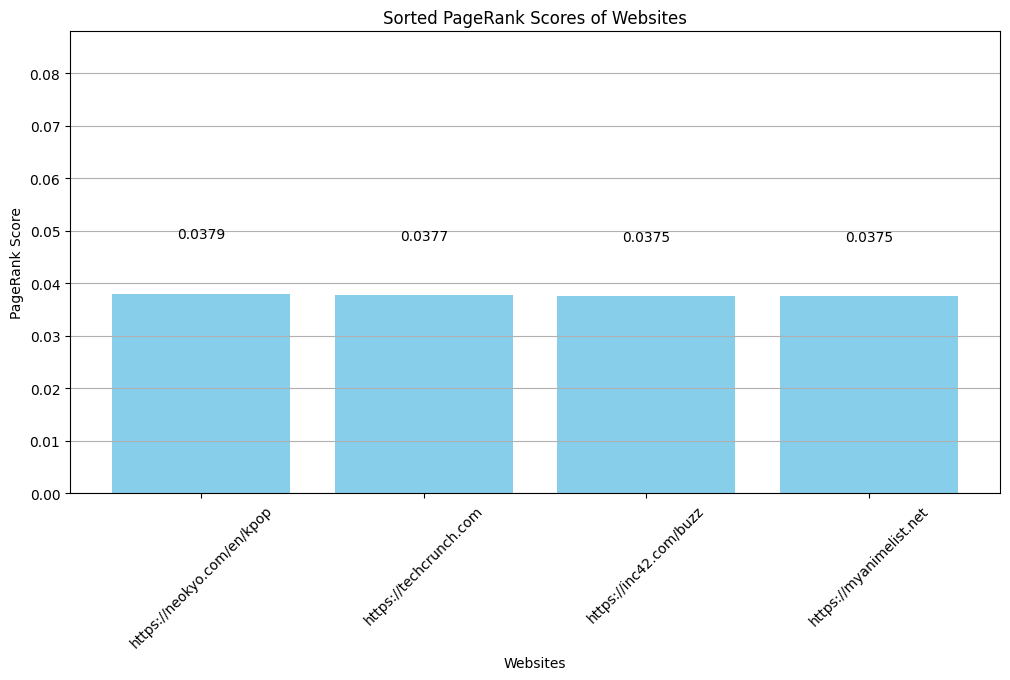

In [ ]:
def plot_sorted_pagerank(pagerank):
    sorted_items = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
    urls, ranks = zip(*sorted_items)

    plt.figure(figsize=(12, 6))
    bars = plt.bar(urls, ranks, color='skyblue')
    plt.xlabel('Websites')
    plt.ylabel('PageRank Score')
    plt.title('Sorted PageRank Scores of Websites')
    plt.xticks(rotation=45)

    # Set y-axis limits
    plt.ylim(0, max(ranks) + 0.05)  # Adjust +0.05 for better visibility

    # Add annotations
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha='center', va='bottom')

    plt.grid(axis='y')  # Add horizontal grid lines
    plt.show()

# Plot sorted PageRank scores
plot_sorted_pagerank(pagerank)
